### 딥러닝 라이브러리
- tensorflow
- keras
- pytorch
    - tensorflow 2.9
    - 2.0부터 keras 문법을 사용.

### Bike Sharing Demand
- 딥러닝 이미지, 시계열데이터터
- 인공신경망
    - 입력층
    - 은닉층
    - 출력층
- 입력과 출력
    * 입력 - 2개 변수
    * 출력 - count
- 출력이 어떤 형태가 되는가에 따라서 마지막 출력층이 달라진다.
    * 출력 - 연속형변수
        * 맨 마지막 층 뉴런이 하나 (활성화 함수는 없다.)
    * 출력 - 이진 분류 (범주형 변수 2개)
        * 맨 마지막 층 뉴런이 하나 (활성화 sigmoid)
    * 출력 - 다항 분류 (벙주형 변수 3개 이상)
        * 맨 마지막 층 뉴런이 분듀하고자 하는 개수만큼 (활성화 함수는 softmax) - 모든 결과값을 더해서 1이 나온다.)

### Keras를 이용해서 딥러닝을 만들때
* keras.models.Sequential: 딥러닝 구조를 만드는 큰 틀을 준비
* keras.layers.Dense: 각 세부 층을 설정 또는 지정.
* input_dim = 입력층 특징 개수
* 이미지는 28 * 28 => 784개
* FCL (fully connected layer) - 모든 신경망 연결

### 딥러닝 구조 만들고 계산 또는 가중치 업데이트 알고리증 지정
* model.compile()
* 출력층 결과와 원래 답을 오차를 구하는 함수: loss
    * mean_squared_error: 차의 제곱의 평균
* 가중치를 업데이트를 시키는 알고리즘: rmsprop
* epochs: 모든 데이터 횟수
* batch_size: 
* model.evaluate(): 평가 수행
* model.predict(): 예측 수행
* 인공신경망 하기전에 데이터 정규화 필요

* CNN (Convolutional neural netwrok) - image
* LSMN 

### MNIST 분류 모델 만들기 - 신경망

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
import numpy as np
import sys
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


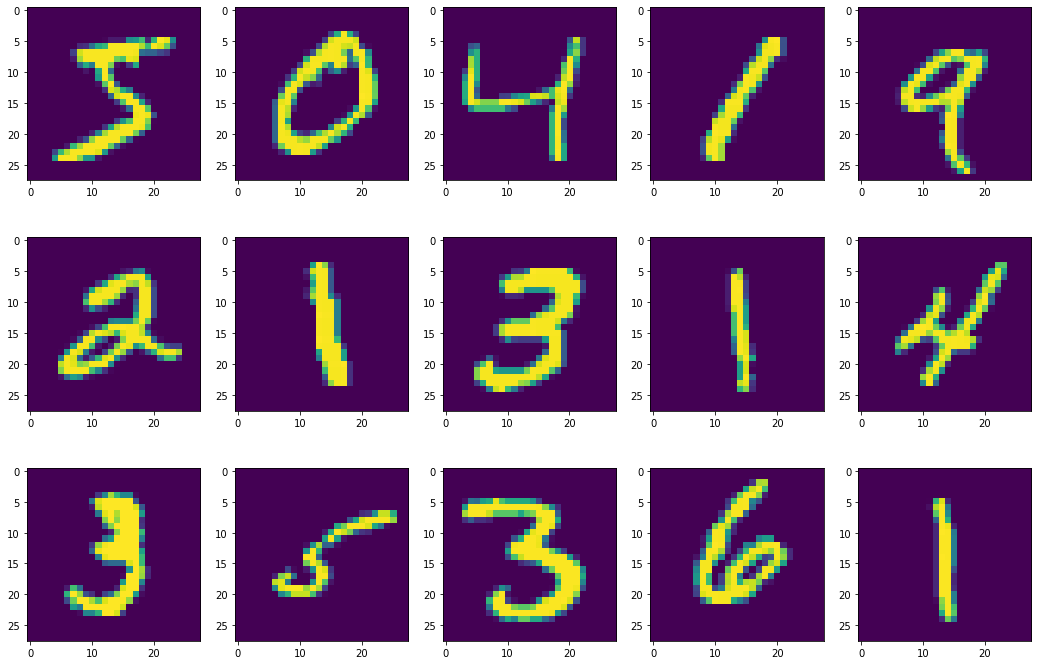

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(18, 12))

print(f'label={y_train[:15]}')

for image, ax in zip(X_train, axes.ravel()):
    ax.imshow(image)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.astype('float64')
X_train = X_train / 255.0

X_test = X_test.reshape(X_test.shape[0], 784)
X_test.astype('float64')
X_test = X_test / 255.0

In [9]:
print(X_train.shape)
print('데이터의 최대, 최소: ', np.min(X_train), np.max(X_train))

(60000, 784)
데이터의 최대, 최소:  0.0 1.0


In [10]:
y_train_1D = np_utils.to_categorical(y_train, 10)
y_test_1D = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [12]:
y_train_1D[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
m = Sequential()
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(128, activation='relu'))
m.add(Dense(10, activation='softmax'))

In [18]:
m.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
history = m.fit(
    X_train, y_train_1D,
    validation_data=(X_test, y_test_1D),
    epochs=30,
    batch_size=200,
    verbose=1
)

Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 0.2691 - accuracy: 0.9225 - val_loss: 0.1160 - val_accuracy: 0.9651
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9710 - val_loss: 0.0840 - val_accuracy: 0.9731
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0620 - accuracy: 0.9808 - val_loss: 0.0749 - val_accuracy: 0.9769
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0687 - val_accuracy: 0.9792
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0648 - val_accuracy: 0.9802
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0152 - accuracy: 0.9958 - val_loss: 0.0691 - val_accuracy: 0.9799
Epoch 

### EarlyStopping()
* 학습의 조기 종료 함수 - EarlyStopping()
* early_stopping = EarlyStopping()
* model.fit(X_train, Y_train, nb_epoch=1000, callbacks=[early_stopping])
* keras.callbakcs.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

In [21]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [22]:
np.random.seed(3)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [23]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [24]:
train_rand_idxs = np.random.choice(50000, 10000)
val_rand_idxs = np.random.choice(10000, 5000)

X_train = X_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [25]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [26]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(10000, 784) (10000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [27]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [32]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=30,
    monitor='val_loss'
)

hist = model.fit(
    X_train, y_train,
    epochs=3000,
    batch_size=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/3000
1000/1000 [==============================] - 1s 756us/step - loss: 1.0107 - accuracy: 0.7201 - val_loss: 0.4233 - val_accuracy: 0.8816
Epoch 2/3000
1000/1000 [==============================] - 1s 691us/step - loss: 0.4012 - accuracy: 0.8858 - val_loss: 0.3353 - val_accuracy: 0.8990
Epoch 3/3000
1000/1000 [==============================] - 1s 716us/step - loss: 0.3208 - accuracy: 0.9086 - val_loss: 0.2744 - val_accuracy: 0.9210
Epoch 4/3000
1000/1000 [==============================] - 1s 686us/step - loss: 0.2748 - accuracy: 0.9223 - val_loss: 0.2513 - val_accuracy: 0.9250
Epoch 5/3000
1000/1000 [==============================] - 1s 698us/step - loss: 0.2406 - accuracy: 0.9303 - val_loss: 0.2588 - val_accuracy: 0.9250
Epoch 6/3000
1000/1000 [==============================] - 1s 712us/step - loss: 0.2165 - accuracy: 0.9375 - val_loss: 0.2343 - val_accuracy: 0.9268
Epoch 7/3000
1000/1000 [==============================] - 1s 712us/step - loss: 0.1917 - accuracy: 0.9459 - val_

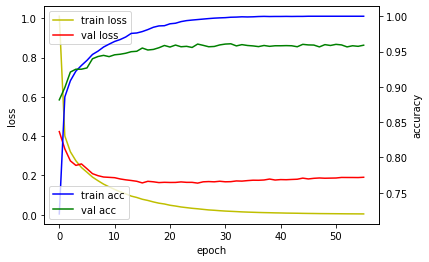

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()